In [ ]:
!pip install opencv_python

In [12]:
import os
import glob
import cv2

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from skimage import filters

In [25]:
im_list = glob.glob('images/*')

In [26]:
test_im = cv2.imread(im_list[0])

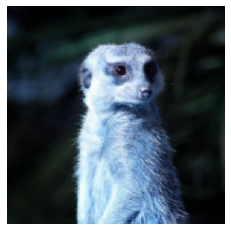

In [27]:
plt.imshow(test_im)
plt.axis('off');

# Hm-hm, something weird with colors, what if...

In [28]:
correct_im = cv2.cvtColor(test_im, cv2.COLOR_BGR2RGB)

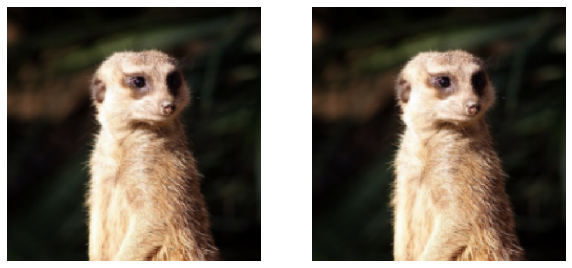

In [29]:
plt.subplots(figsize=(10, 20))
plt.subplot(1,2,1)
plt.imshow(correct_im)
plt.axis('off');
plt.subplot(1,2,2)
plt.imshow(test_im[:, :, ::-1])
plt.axis('off');

In [30]:
im = correct_im

In [80]:
help(cv2.filter2D)

Help on built-in function filter2D:

filter2D(...)
    filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) -> dst
    .   @brief Convolves an image with the kernel.
    .   
    .   The function applies an arbitrary linear filter to an image. In-place operation is supported. When
    .   the aperture is partially outside the image, the function interpolates outlier pixel values
    .   according to the specified border mode.
    .   
    .   The function does actually compute correlation, not the convolution:
    .   
    .   \f[\texttt{dst} (x,y) =  \sum _{ \substack{0\leq x' < \texttt{kernel.cols}\\{0\leq y' < \texttt{kernel.rows}}}}  \texttt{kernel} (x',y')* \texttt{src} (x+x'- \texttt{anchor.x} ,y+y'- \texttt{anchor.y} )\f]
    .   
    .   That is, the kernel is not mirrored around the anchor point. If you need a real convolution, flip
    .   the kernel using #flip and set the new anchor to `(kernel.cols - anchor.x - 1, kernel.rows -
    .   anchor.y - 1)`.
    

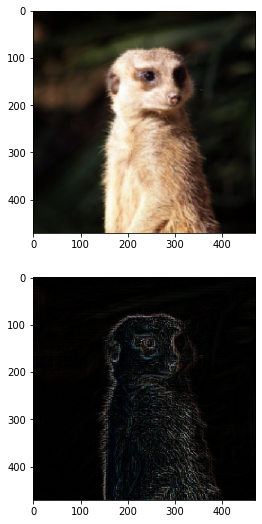

In [140]:
kernel = np.array([
    [1,0,1],
    [1,-6,0],
    [1,1,1]
])

#kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)

plt.figure(figsize=(16,9))

plt.subplot(2,1,2)
plt.imshow(cv2.filter2D(im,-1, kernel))
plt.subplot(2,1,1)
plt.imshow(im)

In [41]:
matrix = im[:3,:3,0]

In [76]:
matrix[:2,:2]

array([[15, 15],
       [15, 15]], dtype=uint8)

In [ ]:
def convolve(im_rgb, kernel):
    result_im = 
    for channel_ind in range(im_rgb.shape[2]):
        

# TASK 1 (+1)
## Imitate color blindness, knowing what colorblind people do not perceive one of the colors in SML color space, show interesting examples

In [8]:
rgb_to_lms_matrix = np.array([[0.38971, 0.68898, -0.07868],
                              [-0.22981, 1.1834, 0.04641],
                              [0.,0.,1.]])

In [9]:
def rgb_to_lms(pic):
    """
    Turns picture (actually np.array with shape(x, y, 3)) in RGB
    color space into image in LMS color space.
    """
    pic_copy = pic.copy()
    transform_matrix = rgb_to_lms_matrix
    for rows_ind in range(len(pic)):
        for cols_ind in range(len(pic[rows_ind])):
            pic_copy[rows_ind][cols_ind] = np.dot(transform_matrix, pic[rows_ind][cols_ind])
    return pic_copy

In [10]:
def lms_to_rgb(pic):
    """
    Turns picture (actually np.array with shape(x, y, 3)) in LMS
    color space into image in RGB color space.
    """
    pic_copy = pic.copy()
    transform_rev_matrix = np.linalg.inv(rgb_to_lms_matrix)
    for rows_ind in range(len(pic)):
        for cols_ind in range(len(pic[rows_ind])):
            pic_copy[rows_ind][cols_ind] = np.dot(transform_rev_matrix, pic[rows_ind][cols_ind])
    return pic_copy

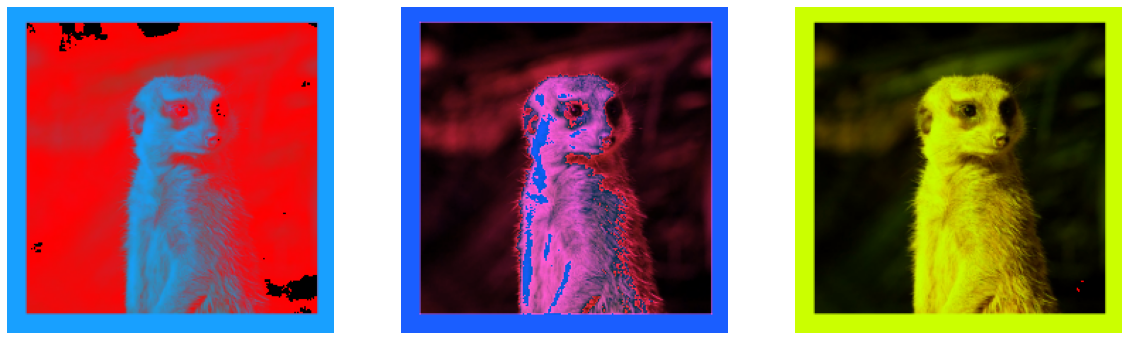

In [12]:
src = rgb_to_lms(correct_im.copy())
src[:,:,0] = np.zeros([src.shape[0], src.shape[1]])
red_blind = lms_to_rgb(src)

src = rgb_to_lms(correct_im.copy())
src[:,:,1] = np.zeros([src.shape[0], src.shape[1]])
green_blind = lms_to_rgb(src)

src = rgb_to_lms(correct_im.copy())
src[:,:,2] = np.zeros([src.shape[0], src.shape[1]])
blue_blind = lms_to_rgb(src)

plt.subplots(figsize=(20, 6))

plt.subplot(1,3,1)
plt.imshow(red_blind)
plt.axis('off');

plt.subplot(1,3,2)
plt.imshow(green_blind)
plt.axis('off');

plt.subplot(1,3,3)
plt.imshow(blue_blind)
plt.axis('off');

Shifting: let's add some constant to a channel and see what happens

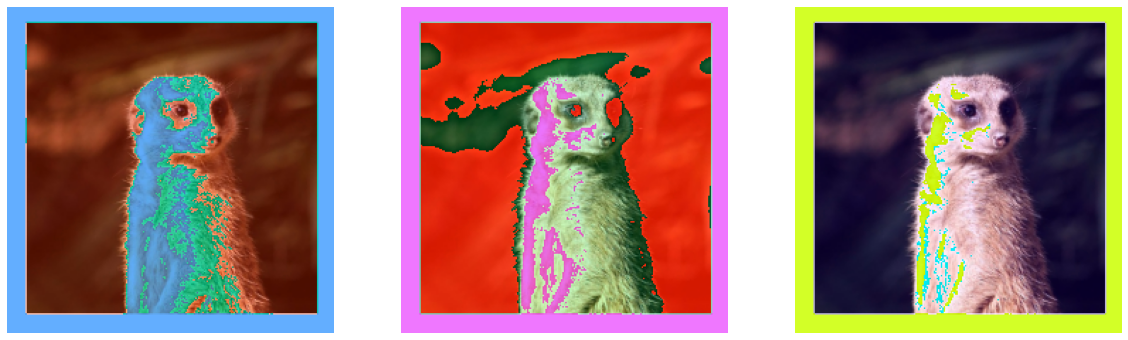

In [15]:
src = rgb_to_lms(correct_im.copy())
src[:,:,0] = src[:,:,0] + 40
red_blind = lms_to_rgb(src)

src = rgb_to_lms(correct_im.copy())
src[:,:,1] = src[:,:,1] + 40
green_blind = lms_to_rgb(src)

src = rgb_to_lms(correct_im.copy())
src[:,:,2] = src[:,:,2] + 40
blue_blind = lms_to_rgb(src)

plt.subplots(figsize=(20, 6))

plt.subplot(1,3,1)
plt.imshow(red_blind)
plt.axis('off');

plt.subplot(1,3,2)
plt.imshow(green_blind)
plt.axis('off');

plt.subplot(1,3,3)
plt.imshow(blue_blind)
plt.axis('off');


# TASK 2 (+3)
## Implement k-means segmentation in RGB in HSV color space, show interesting examples


In [14]:
import pandas as pd

from sklearn.cluster import KMeans

Experimental color palette will be used to assign colors for clusters is set by the following rule:

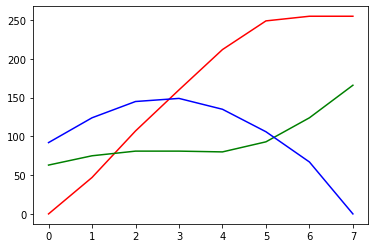

In [15]:
red = {0:0, 1:47, 2:107, 3:160, 4:212, 5:249, 6:255, 7:255}
green = {0:63,1:75,2:81,3:81,4:80,5:93,6:124,7:166}
blue = {0:92,1:124,2:145,3:149,4:135,5:106,6:67,7:0}

plt.plot(red.keys(), red.values(), color='r')
plt.plot(green.keys(), green.values(), color='g')
plt.plot(blue.keys(), blue.values(), color='b')

In [16]:
def k_means_segmentation(source_image, color_scheme='mean', n_clusters=7):
    """
    Takes picture to apply K-Means segmentation. 
    Returns a tuple with images, processed in RGB and HSV.
    
    Argruments:
    -------------
    source_image, np.array with shape (x, y, 3):
        Image to segmentate.
    color_scheme, str:
        Color scheme that will be used. 
        Possible variants are 'mean' and 'experimental'.
        'mean' - there'll be computed and assigned mean colors for each cluster.
        'experimental' - beautiful 'deep orange and purple ' color palette will be used.
        
        'mean' is set by default.
    n_clusters, int:
        Number of cluster to apply segmentation.
        
        7 is set by default.
    """
    df = pd.DataFrame(columns=['x', 'y', 'R', 'G', 'B', 'H', 'S', 'V'])

    im = source_image.copy()
    hsv_im = cv2.cvtColor(source_image, cv2.COLOR_RGB2HSV)

    pixels_data = []

    for i in range(len(im)):
        for j in range(len(im[i])):
            rgb = im[i][j]
            hsv = hsv_im[i][j]

            new_pixel = {}
            new_pixel['x'] = i
            new_pixel['y'] = j
            new_pixel['R'] = rgb[0]
            new_pixel['G'] = rgb[1]
            new_pixel['B'] = rgb[2]
            new_pixel['H'] = hsv[0]
            new_pixel['S'] = hsv[1]
            new_pixel['V'] = hsv[2]

            pixels_data.append(new_pixel)

    df = df.append(pixels_data, ignore_index=True)

    kmeans = KMeans(n_clusters=n_clusters)
    df['cluster_rgb'] = kmeans.fit_predict(df[['R', 'G', 'B']])
    df['cluster_hsv'] = kmeans.fit_predict(df[['H', 'S', 'V']])

    channels_list = ['R', 'G', 'B', 'H', 'S', 'V']
    
    if color_scheme  == 'mean':
        mean_cluster_values_rgb = {i : {ch: np.mean(df[df['cluster_rgb'] == i][ch]) for ch in channels_list}
                                    for i in range(n_clusters)}

        for index, row in df.iterrows():
            for ch in channels_list:
                df.at[index, ch] = mean_cluster_values_rgb[row['cluster_rgb']][ch]
    elif color_scheme == 'experimental':
        # try it!
        mean_cluster_values_rgb = {i : {ch: np.mean(df[df['cluster_rgb'] == i][ch]) for ch in channels_list}
                                    for i in range(n_clusters)}
        
        mean_cl_colors_brigthnesses = [[i, (0.3*mean_cluster_values_rgb[i]['R'] + 
                                            0.59*mean_cluster_values_rgb[i]['G'] + 
                                            0.11*mean_cluster_values_rgb[i]['B'])]
                                       for i in range(n_clusters)]
        mean_cl_colors_brigthnesses = sorted(mean_cl_colors_brigthnesses, key = lambda color: color[1])
        # assigning brightness rank 
        for i in range(n_clusters):
            mean_cl_colors_brigthnesses[i].append(i)
        # going back to cluster numbers
        mean_cl_colors_brigthnesses = sorted(mean_cl_colors_brigthnesses, key = lambda color: color[0])
        
        clusters_color_channels = {}
        for i in range(n_clusters):
            curr_color_point = mean_cl_colors_brigthnesses[i][2]*len(red.values())/n_clusters
            clusters_color_channels[i] = {}
            clusters_color_channels[i]['R'] = np.interp(xp=list(red.keys()), fp=list(red.values()), x=curr_color_point)
            clusters_color_channels[i]['G'] = np.interp(xp=list(green.keys()), fp=list(green.values()), x=curr_color_point)
            clusters_color_channels[i]['B'] = np.interp(xp=list(blue.keys()), fp=list(blue.values()), x=curr_color_point)
            clusters_color_channels[i]['H'] = np.interp(xp=list(red.keys()), fp=list(red.values()), x=curr_color_point)
            clusters_color_channels[i]['S'] = np.interp(xp=list(green.keys()), fp=list(green.values()), x=curr_color_point)
            clusters_color_channels[i]['V'] = np.interp(xp=list(blue.keys()), fp=list(blue.values()), x=curr_color_point)
        for index, row in df.iterrows():
            for ch in channels_list:
                df.at[index, ch] = clusters_color_channels[row['cluster_rgb']][ch]
                
    # assigning results we've got
    
    w = len(im)
    h = len(im[0])
    
    for i in range(w):
        for j in range(h):
            im[i][j][0] = df.iloc[h*i + j]['R']
            im[i][j][1] = df.iloc[h*i + j]['G']
            im[i][j][2] = df.iloc[h*i + j]['B']           
            hsv_im[i][j][0] = df.iloc[h*i + j]['H']
            hsv_im[i][j][1] = df.iloc[h*i + j]['S']
            hsv_im[i][j][2] = df.iloc[h*i + j]['V']
            
    return im, hsv_im

In [17]:
im = k_means_segmentation(correct_im, color_scheme='experimental', n_clusters=7)[0]
# hsv на экспериментальную палитру партия не выделила

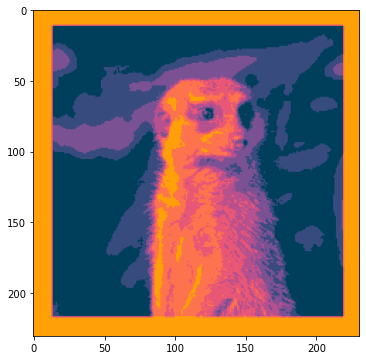

In [18]:
plt.subplots(figsize=(20, 6))

plt.imshow(im)

In [19]:
im, hsv_im = k_means_segmentation(correct_im, color_scheme='mean', n_clusters=5)

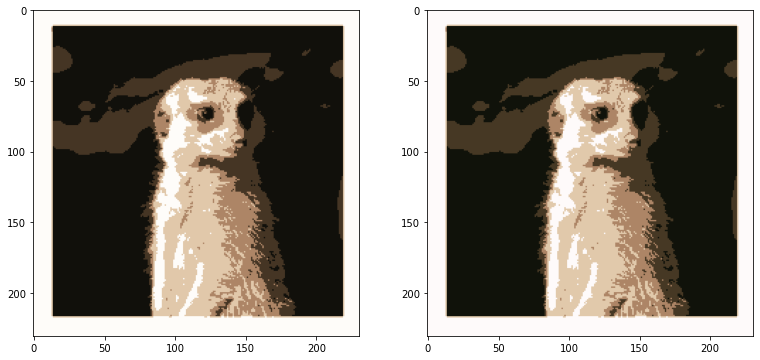

In [20]:
plt.subplots(figsize=(20, 6))

plt.subplot(1,3,1)
plt.imshow(im)

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(hsv_im, cv2.COLOR_HSV2RGB))

With HSV color scheme we have same clusters but different colors (albeit a little)


# TASK 3 (+4)

## Guess RGB coeffs using keras model

In [ ]:
!pip install tensorflow

In [11]:
import math

import numpy as np
import tensorflow as tf

from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras import Input

By default, `x` are images and `y` are labels when loading this dataset. I'll reassign `y` color images, `x` - grayscaled.

In [12]:
def px_RGB_to_gray(color_pixel):
    """
    Takes [r, g, b] pixel and turns it to gray [g, g, g], 
    using the following formula:
        g = 0.3*r + 0.59*g + 0.11*b
    """
    return int(0.30*color_pixel[0] + 0.59*color_pixel[1] + 0.11*color_pixel[2])

In [13]:
def im_RGB_to_gray(image):
    """
    Takes np.array with shape (x, y, 3) and returns np.array
    with the same shape, but turns [r, g, b] elements into
    [g, g, g] - gray version.
    """
    gray_image = image.copy()
    for i in range(len(image)):
        for j in range(len(image[0])):
            color_pixel = image[i][j]
            gray_image[i][j] = px_RGB_to_gray(color_pixel)
    return gray_image

In [4]:
def image_to_row(image):
    """
    Takes collection of shape (x, y, 3) and returns list
    of pixel lists with shape (3xy,). "Straighten" image array.
    """
    # rgbrgbrgbrgbrgbrgbrgbrgb....
    row = []
    for i in range(len(image)):
        for j in range(len(image[0])):
            row.append(image[i][j][0])
            row.append(image[i][j][1])
            row.append(image[i][j][2])
    return row

In [5]:
def image_to_pixel_row(image):
    """
    Takes collection of shape (x, y, 3) and returns list
    of pixel lists with shape (xy,). "Straighten" image by pixels.
    """
    # [rgb][rgb][rgb][rgb][rgb][rgb][rgb][rg....
    row = []
    for i in range(len(image)):
        for j in range(len(image[0])):
            new_px = []
            new_px.append(image[i][j][0])
            new_px.append(image[i][j][1])
            new_px.append(image[i][j][2])
            row.append(new_px)
    return row

In [6]:
def row_to_image(row):
    """
    Takes collection of shape (3n^2,) and returns np.array
    with shape (n, n, 3) and the same data. "Unfolds" square image.
    """
    size = int(math.sqrt(len(row)/3))
    image = np.zeros((size,size,3), dtype=int)
    for i in range(size):
        for j in range(size):
            rgb_pixel = []
            rgb_pixel.append(int(row[3*i*size + 3*j]))
            rgb_pixel.append(int(row[3*i*size + 3*j + 1]))
            rgb_pixel.append(int(row[3*i*size + 3*j + 2]))
            image[i][j] = rgb_pixel
    return image

In [8]:
#... data load
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train[:10000]
x_test = x_test[:1000]
y_train = y_train[:10000]
y_test = y_test[:1000]

In [ ]:
y_train = x_train.copy()
y_test = x_test.copy()
x_train = [im_RGB_to_gray(x) for x in x_train]
x_test = [im_RGB_to_gray(x) for x in x_test]

x_train = np.array([np.array(image_to_row(x)) for x in x_train])
y_train = np.array([np.array(image_to_row(y)) for y in y_train])

In [ ]:
model1 = Sequential()

model1.add(Dense(3072, input_dim=3072,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(2048, activation='relu'))
model1.add(Dropout(0.2))
#model1.add(Dense(2048, activation='relu'))
#model1.add(Dropout(0.2))
model1.add(Dense(3072, activation='relu'))

model1.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [ ]:
model2 = Sequential()

model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(3072, activation='relu'))
model2.add(layers.Dense(3072, activation='relu'))

model2.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [ ]:
with tf.device('/device:GPU:0'):
    model1.fit(x_train, y_train, epochs=500, batch_size=10)

In [ ]:
x_test = np.array([np.array(image_into_row(x)) for x in x_test])

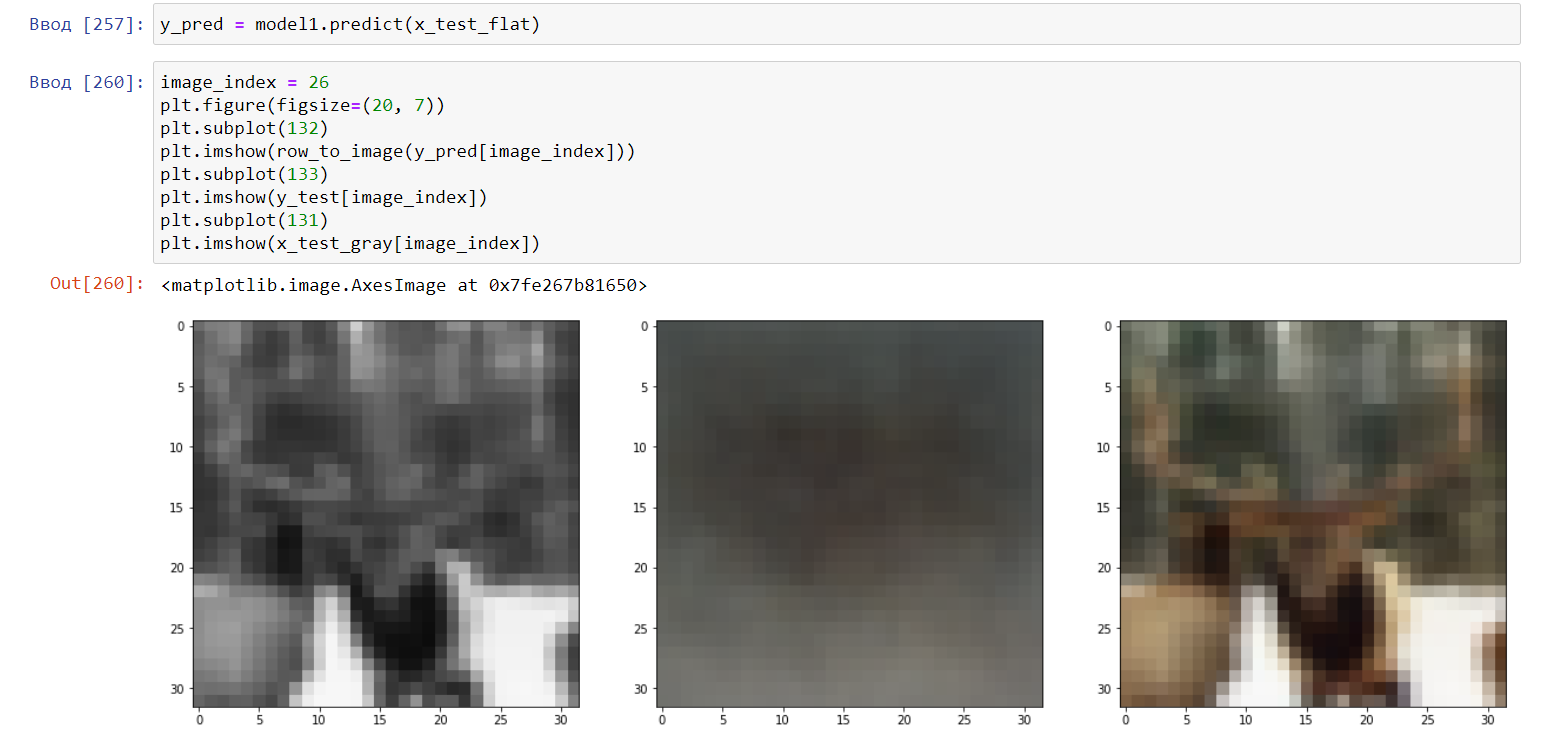

At first I thought I must have done model that tries to paint grayscaled image :)

Tried to use CNN, simple deep dense neural network, got different results.

But now I'm doing right what I was expected to.

The only idea I've got for such formulation of the problem is to let model train pixel-by-pixel. I should make network with 3 inputs, 1 layer with 3 neurons and 1 output, that is grayscaled pixel. 

Otherwise we face some problems.

If we try to train network to perform 'image-to-image' transformation (RGB to gray), then there'll be no way we'll have only 3 neurons inside: it's crazy to require 3 nodes to give 1000 outputs (32x32 image).

If we try to give 2 images as input and have 3 outputs - our coefficients -, then we face a problem how to train this network, to take different R, G, B coeffs for different train outputs. Also I can't imagine what amount of data is required for the network to understand the relation in that case.

If we do simple dense 'image-to-image' network, then we simply can't get any coefficients we are required to guess.

So I've decided to train network pixel-by-pixel then.

In [7]:
#... data load
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train[:100]
x_test = x_test[:10]
y_train = y_train[:100]
y_test = y_test[:10]

In [8]:
pixels_train = []

for im_train in x_train:
    pixels_train.extend(image_to_pixel_row(im_train))
    
grayscaled_train = []

for px in pixels_train:
    grayscaled_train.append(px_RGB_to_gray(px))

In [9]:
len(pixels_train)

102400

In [18]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

model3 = Sequential()

model3.add(Input(shape=(3,)))
#model3.add(Dense(3, activation='relu'))
model3.add(Dense(1, use_bias=False))

model3.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [19]:
model3.fit(np.array(pixels_train),
           np.array(grayscaled_train), 
           epochs=25, batch_size=10, 
           callbacks=[early_stopping_callback, tensorboard_callback])

Epoch 1/25
10240/10240 [==============================] - 20s 623us/step - loss: 132.4885 - mae: 132.4885 ETA: 1s - loss: 152.1
Epoch 2/25
10240/10240 [==============================] - 5s 499us/step - loss: 0.3305 - mae: 0.3305 5s - loss
Epoch 3/25
10240/10240 [==============================] - 5s 497us/step - loss: 0.3298 - mae: 0.3298 ETA: 1s - l
Epoch 4/25
10240/10240 [==============================] - 5s 504us/step - loss: 0.3291 - mae: 0.3291 1s - loss: 0.3289 - mae: 0.328 - ET
Epoch 5/25
10240/10240 [==============================] - 5s 500us/step - loss: 0.3283 - mae: 0.3283
Epoch 6/25
10240/10240 [==============================] - 5s 501us/step - loss: 0.3294 - mae: 0.3294
Epoch 7/25
10240/10240 [==============================] - 5s 503us/step - loss: 0.3297 - mae: 0.3297
Epoch 8/25
10240/10240 [==============================] - 5s 502us/step - loss: 0.3304 - mae: 0.3304 2s - loss: 0 - ETA: 1s - loss: 0.330 - ETA: 0s - loss: 0.3303 - m


In [23]:
test_im = x_test[0]
test_im_true_gray = im_RGB_to_gray(x_test[0])

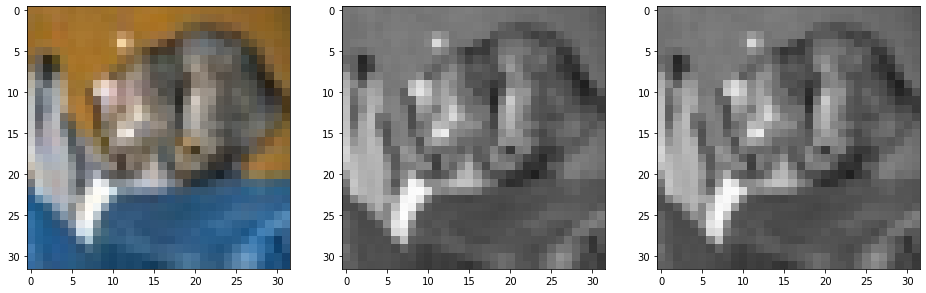

In [24]:
plt.figure(figsize=(16,5))

plt.subplot(131)
plt.imshow(test_im)

plt.subplot(132)
plt.imshow(test_im_true_gray)

plt.subplot(133)
pred_grayscaled = model3.predict(np.array(image_to_pixel_row(test_im)))

row_grayscaled = []

for gray_val in pred_grayscaled:
    val = int(gray_val[0])
    row_grayscaled.append(val)
    row_grayscaled.append(val)
    row_grayscaled.append(val)
    
plt.imshow(row_to_image(row_grayscaled))

In [25]:
model3.weights

[<tf.Variable 'dense_3/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[0.29802123],
        [0.5887866 ],
        [0.11007549]], dtype=float32)>]

That's definitely it!

In [ ]:
# а tensorboard не будет, я на него потратил слишком много переустановок анаконды, пипа,
# питона, времени, нервов и прочего, так что так)))